# **Data Loading and Inspection**

In [1]:
import pandas as pd

# Load dataset
file_path = '/content/dsa_job.xlsx'
df = pd.read_excel(file_path)

In [2]:
print(df.head())

   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1       2020                Statistician  (Remote)         ML/AI   
2       2022             Machine Learning Engineer         ML/AI   
3       2022               Data Analyst  in office         ML/AI   
4       2020                          Statistician  Data Science   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR  186597         136086                 US               MI   
1             JPY  110630          67982                 JP               EX   
2             INR   61280         153309                 UK               MI   
3             JPY  154130         135242                 DE               SE   
4             EUR  172312          35156                 UK               MI   

  employment_type work_setting company_location company_size  
0              CT       Remote               DE

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None


In [4]:
print(df.describe())

        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  102046.307200  114076.995800
std       0.81951   70853.626492   49113.807687
min    2020.00000 -198754.000000   30016.000000
25%    2020.00000   64295.500000   71343.750000
50%    2021.00000  110636.000000  114167.000000
75%    2022.00000  153104.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


# **Data Cleaning**

**Data Type Conversion**

In [5]:
# Check data types before conversion
print("Data types before conversion:")
print(df.dtypes)

# Convert work_year to integer
df['work_year'] = df['work_year'].astype(int)

# Convert categorical columns to 'category' data type
categorical_columns = ['job_title', 'job_category', 'salary_currency', 'employee_residence',
                       'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Check data types after conversion
print("\nData types after conversion:")
print(df.dtypes)


Data types before conversion:
work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

Data types after conversion:
work_year                int64
job_title             category
job_category          category
salary_currency       category
salary                   int64
salary_in_usd            int64
employee_residence    category
experience_level      category
employment_type       category
work_setting          category
company_location      category
company_size          category
dtype: object


**Handling Missing Values**

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64


In [7]:
# Check for rows where salary_currency is missing and salary contains negative values
invalid_rows = df[(df['salary_currency'].isnull()) & (df['salary'] < 0)]

# Print the number of rows to be removed
print(f"Number of invalid rows to be removed: {invalid_rows.shape[0]}")

# Remove those rows from the dataset
df = df[~((df['salary_currency'].isnull()) & (df['salary'] < 0))]

# Verify the dataset after removal
print(f"Number of rows after removal: {df.shape[0]}")


Number of invalid rows to be removed: 250
Number of rows after removal: 4750


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 work_year               0
job_title               0
job_category          250
salary_currency       250
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      250
employment_type         0
work_setting            0
company_location        0
company_size          250
dtype: int64


In [9]:
# # Fill missing values in salary_currency based on company_location
# df.loc[(df['salary_currency'].isnull()) & (df['company_location'] == 'US'), 'salary_currency'] = 'USD'

# # Verify if missing values are updated
# missing_values_after = df.isnull().sum()
# print("Missing values after filling salary_currency:\n", missing_values_after)

In [10]:
df = df.dropna()

In [11]:
# Display unique values after cleaning
print("Unique job titles before cleaning:")
print(df['job_title'].unique())

Unique job titles before cleaning:
['Machine Learning Engineer  in office', 'Statistician  (Remote)', 'Machine Learning Engineer', 'Data Analyst  in office', 'Statistician', ..., 'Data Engineer  (Remote)', 'Machine Learning Engineer  (Remote)', 'Data Analyst  (Remote)', 'Statistician  in office', 'Data Scientist  in office']
Length: 15
Categories (15, object): ['Data Analyst', 'Data Analyst  (Remote)', 'Data Analyst  in office',
                          'Data Engineer', ..., 'Machine Learning Engineer  in office',
                          'Statistician', 'Statistician  (Remote)', 'Statistician  in office']


In [12]:
def clean_job_title(title):
    # Remove leading and trailing spaces, convert to lowercase
    title = title.strip().lower()

    # Standardize descriptors
    title = title.replace(" in office", "(in-office)")
    title = title.replace(" (remote)", "(remote)")

    # Remove descriptors like "(in-office)" or "(remote)" for mapping
    base_title = title.split(" (")[0].strip()

    # Map to common job categories
    job_mapping = {
        "machine learning engineer": "Machine Learning Engineer",
        "data scientist": "Data Scientist",
        "data analyst": "Data Analyst",
        "data engineer": "Data Engineer",
        "statistician": "Statistician"
    }
    return job_mapping.get(base_title, base_title)  # Fallback to cleaned base title

# Apply the cleaning function to the job_title column
df['job_title'] = df['job_title'].apply(clean_job_title)

# Display unique values after cleaning
print("Unique job titles after cleaning:")
print(df['job_title'].unique())


Unique job titles after cleaning:
['Machine Learning Engineer' 'Statistician' 'Data Analyst'
 'Data Scientist' 'Data Engineer']


**Standardizing Categorical Values**

In [13]:
# Standardize categorical columns to uppercase
text_columns = ['job_title', 'job_category', 'experience_level', 'employment_type', 'work_setting', 'company_size']
for col in text_columns:
    df.loc[:, col] = df[col].str.upper()

# experience level has consistent values
experience_levels = ['MI', 'SE', 'CT']
df = df[df['experience_level'].isin(experience_levels)].copy()

# Standardize salary_currency
df.loc[:, 'salary_currency'] = df['salary_currency'].str.upper()


<ipython-input-13-50b93d7063cd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['ANALYSIS' 'ML/AI' 'ML/AI' ... 'ANALYSIS' 'DATA SCIENCE' 'ENGINEERING']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].str.upper()
<ipython-input-13-50b93d7063cd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['REMOTE' 'REMOTE' 'HYBRID' ... 'HYBRID' 'REMOTE' 'REMOTE']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].str.upper()
<ipython-input-13-50b93d7063cd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['EUR' 'INR' 'JPY' ... 'EUR' 'GBP' 'EUR']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, 's

In [14]:
print(df['salary_currency'].unique())

['EUR' 'INR' 'JPY' 'US DOLARS' 'GBP']


In [15]:
# Replace 'US DOLARS' with 'USD'
df['salary_currency'] = df['salary_currency'].str.upper().str.strip()  # Ensure all are uppercase and no extra spaces
df['salary_currency'] = df['salary_currency'].replace({'US DOLARS': 'USD'})

# Check unique values after replacement
print("Unique salary currencies after cleaning:")
print(df['salary_currency'].unique())

Unique salary currencies after cleaning:
['EUR' 'INR' 'JPY' 'USD' 'GBP']


In [16]:
print("Available columns in the DataFrame:")
print(df.columns)


Available columns in the DataFrame:
Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [17]:
print(df['job_title'].unique())
print(df['job_category'].unique())
print(df['salary_currency'].unique())
# print(df['salary'].unique())
# print(df['salary_in_usd'].unique())
print(df['employee_residence'].unique())
print(df['experience_level'].unique())
print(df['employment_type'].unique())
print(df['work_setting'].unique())
print(df['company_location'].unique())
print(df['company_size'].unique())

['MACHINE LEARNING ENGINEER' 'DATA ANALYST' 'STATISTICIAN' 'DATA ENGINEER'
 'DATA SCIENTIST']
['ANALYSIS' 'ML/AI' 'DATA SCIENCE' 'ENGINEERING']
['EUR' 'INR' 'JPY' 'USD' 'GBP']
['US', 'UK', 'DE', 'CN', 'JP', 'MX', 'IN']
Categories (7, object): ['CN', 'DE', 'IN', 'JP', 'MX', 'UK', 'US']
['MI', 'SE']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']
['CT', 'FT', 'FL', 'PT']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']
['REMOTE' 'HYBRID' 'IN-PERSON']
['DE', 'CN', 'MX', 'UK', 'US', 'JP', 'IN']
Categories (7, object): ['CN', 'DE', 'IN', 'JP', 'MX', 'UK', 'US']
['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']


**Check and Handle Outliers**

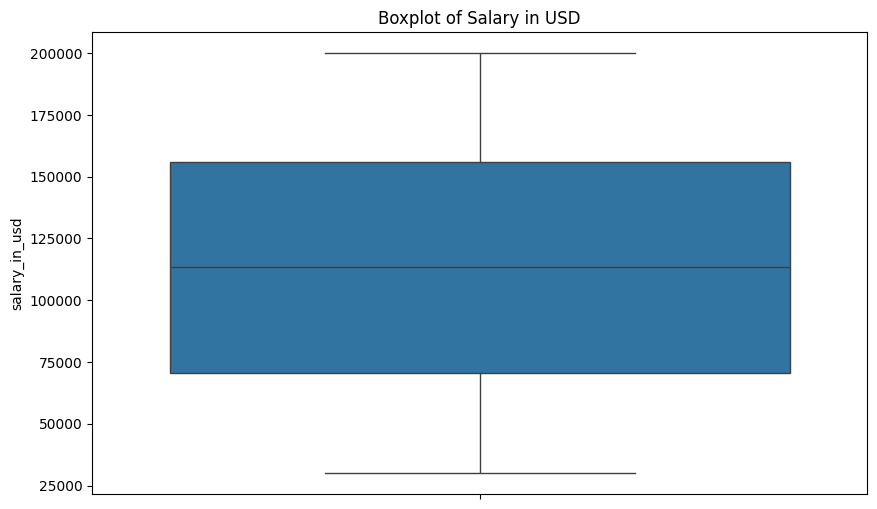

Number of outliers in 'salary_in_usd': 0
<class 'pandas.core.frame.DataFrame'>
Index: 2266 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           2266 non-null   int64   
 1   job_title           2266 non-null   object  
 2   job_category        2266 non-null   object  
 3   salary_currency     2266 non-null   object  
 4   salary              2266 non-null   int64   
 5   salary_in_usd       2266 non-null   int64   
 6   employee_residence  2266 non-null   category
 7   experience_level    2266 non-null   category
 8   employment_type     2266 non-null   category
 9   work_setting        2266 non-null   object  
 10  company_location    2266 non-null   category
 11  company_size        2266 non-null   category
dtypes: category(5), int64(3), object(4)
memory usage: 153.9+ KB
Data summary after cleaning:
 None
Descriptive statistics after cleaning:
          work_yea

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot salary_in_usd distribution to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='salary_in_usd')
plt.title('Boxplot of Salary in USD')
plt.show()

# Detect outliers using the IQR method
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print(f"Number of outliers in 'salary_in_usd': {outliers.shape[0]}")

# Remove outliers
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

# Verify the cleaned data
print("Data summary after cleaning:\n", df.info())
print("Descriptive statistics after cleaning:\n", df.describe())

# **Exploratory Data Analysis (EDA)**

In [19]:
# Summary statistics for numerical columns
print(df[['salary', 'salary_in_usd']].describe())

# Unique values in categorical columns
for col in ['job_category', 'experience_level', 'work_setting', 'company_size']:
    print(f"Unique values in {col}: {df[col].unique()}")


              salary  salary_in_usd
count    2266.000000    2266.000000
mean   113282.618270  113180.962048
std     49169.482276   49313.912212
min     30059.000000   30016.000000
25%     70439.000000   70702.250000
50%    113643.500000  113258.500000
75%    155311.500000  156031.500000
max    199823.000000  199964.000000
Unique values in job_category: ['ANALYSIS' 'ML/AI' 'DATA SCIENCE' 'ENGINEERING']
Unique values in experience_level: ['MI', 'SE']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']
Unique values in work_setting: ['REMOTE' 'HYBRID' 'IN-PERSON']
Unique values in company_size: ['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']


**Visualizations**

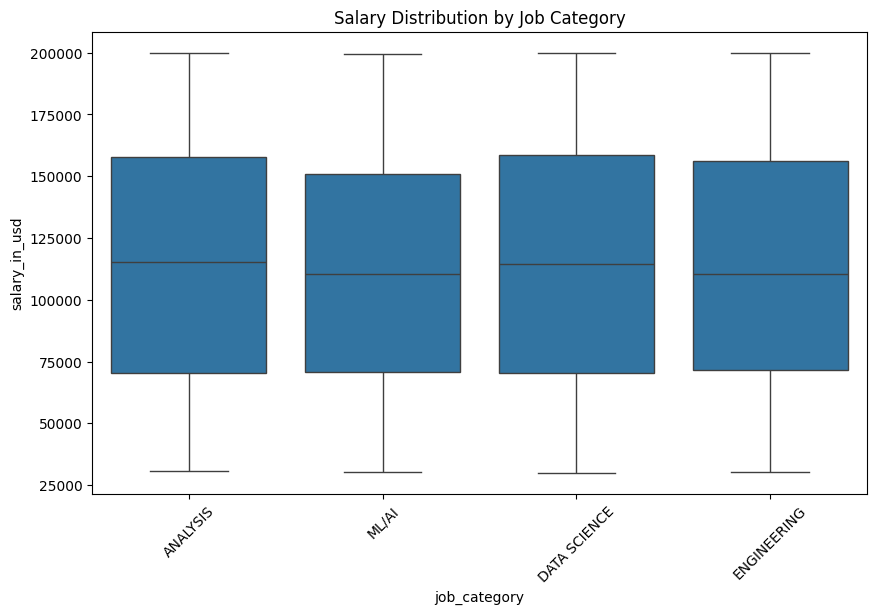

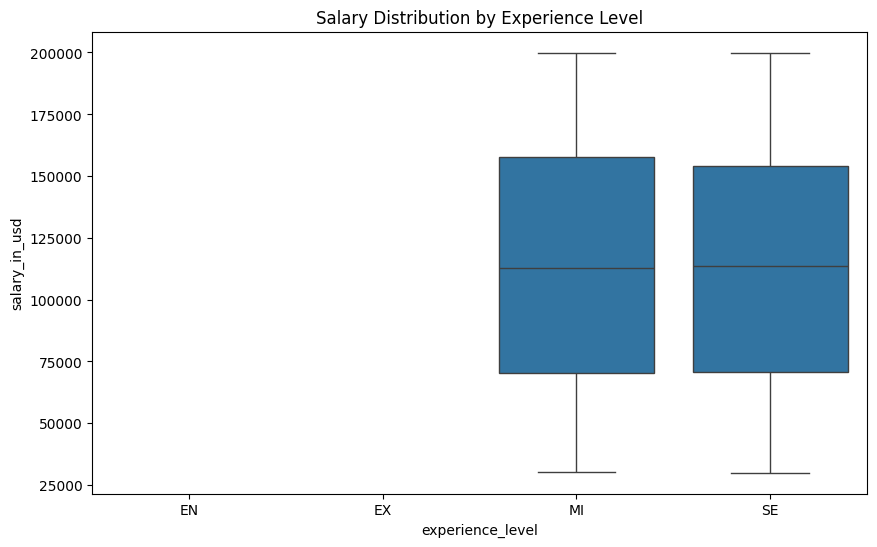

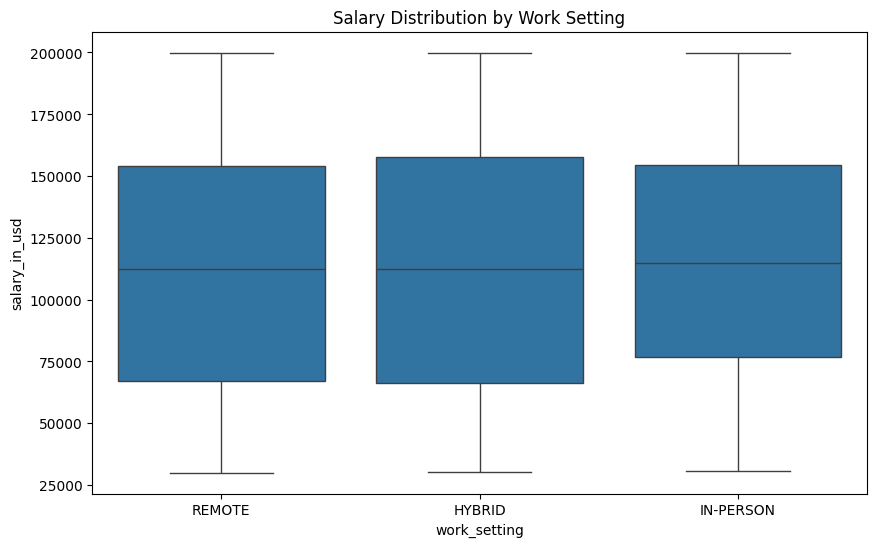

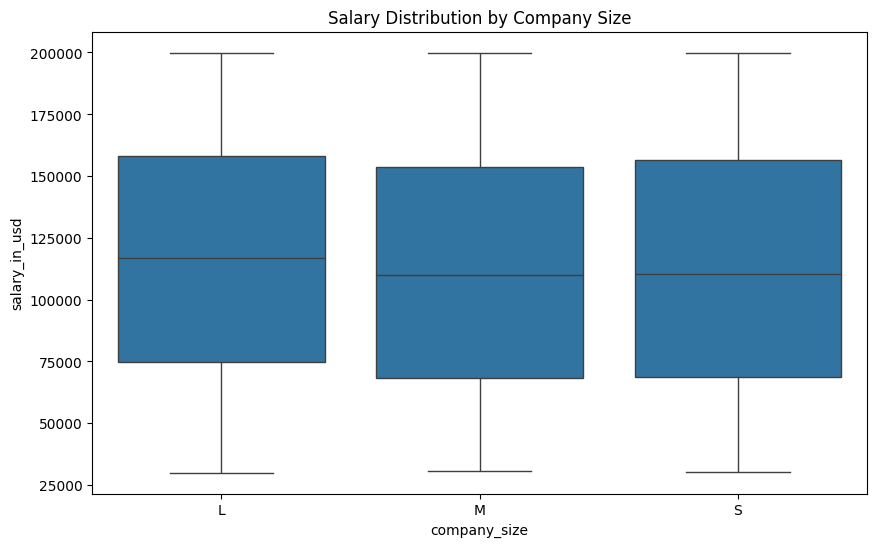

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution by job category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

# Salary distribution by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.show()

# Salary distribution by work setting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd')
plt.title('Salary Distribution by Work Setting')
plt.show()

# Salary distribution by company size
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.show()


**Correlation Analysis**

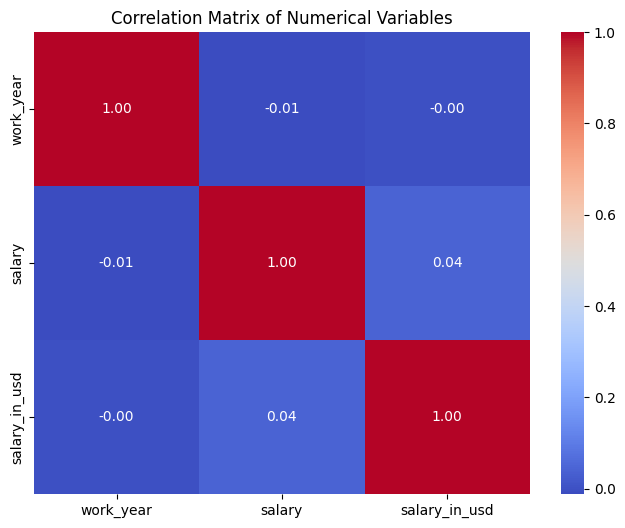

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numerical columns to avoid an empty plot
if not numeric_df.empty:
    # Correlation matrix for numerical variables
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Variables')
    plt.show()
else:
    print("No numerical columns available for correlation analysis.")


**Distribution Analysis**

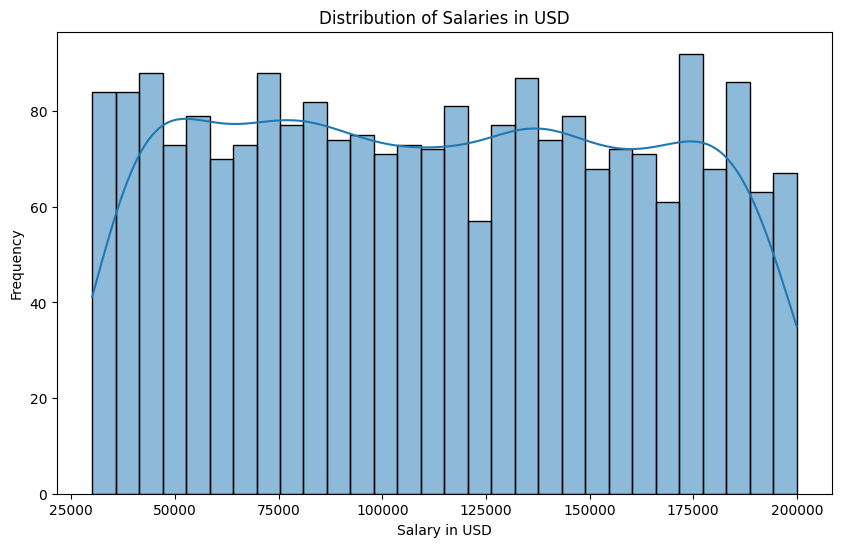

In [22]:
# Histogram and KDE of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


**Analysis by Year**

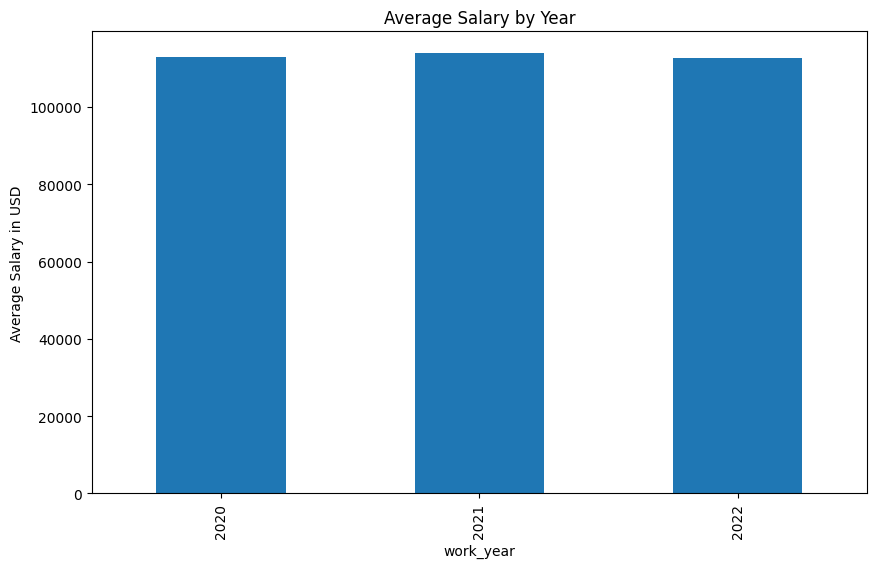

In [23]:
# Average salary by work year
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
avg_salary_by_year.plot(kind='bar', figsize=(10, 6), title='Average Salary by Year', ylabel='Average Salary in USD')
plt.show()


**Experience Level and Salary Analysis**

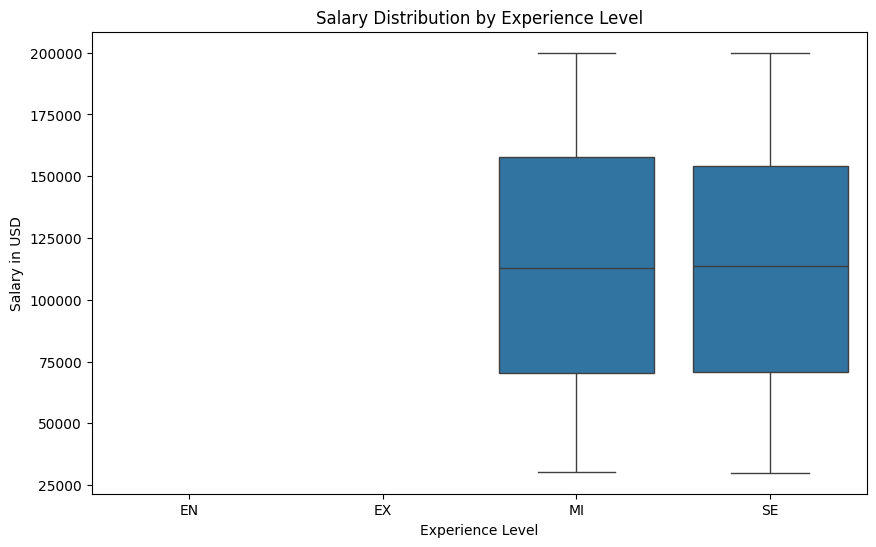

In [24]:
# Boxplot of salary by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


**Location-Based Analysis**

<ipython-input-25-8b4fab6489bd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


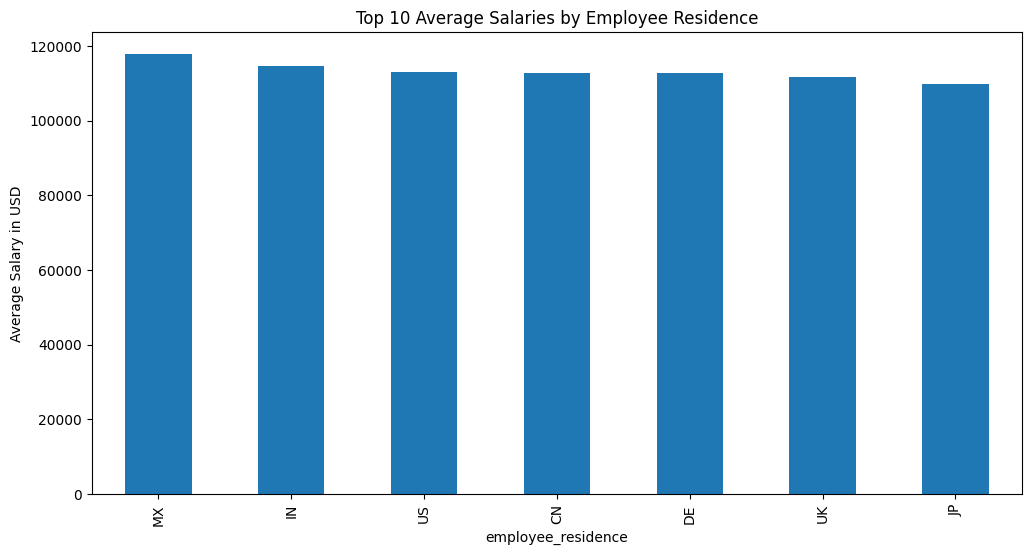

In [25]:
# Average salary by employee residence
avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
avg_salary_by_residence.plot(kind='bar', figsize=(12, 6), title='Top 10 Average Salaries by Employee Residence')
plt.ylabel('Average Salary in USD')
plt.show()


**Job Category Analysis**

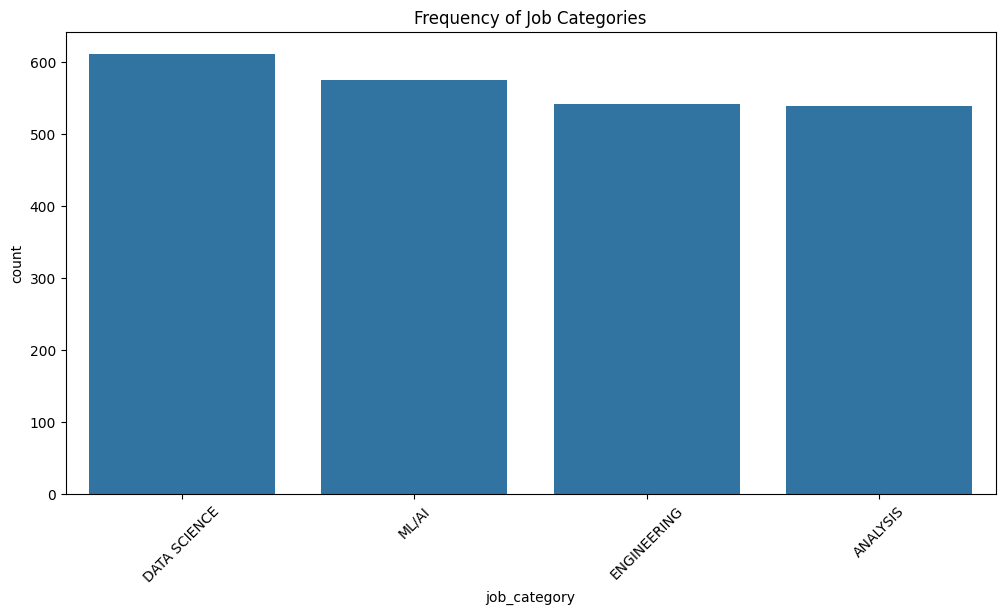

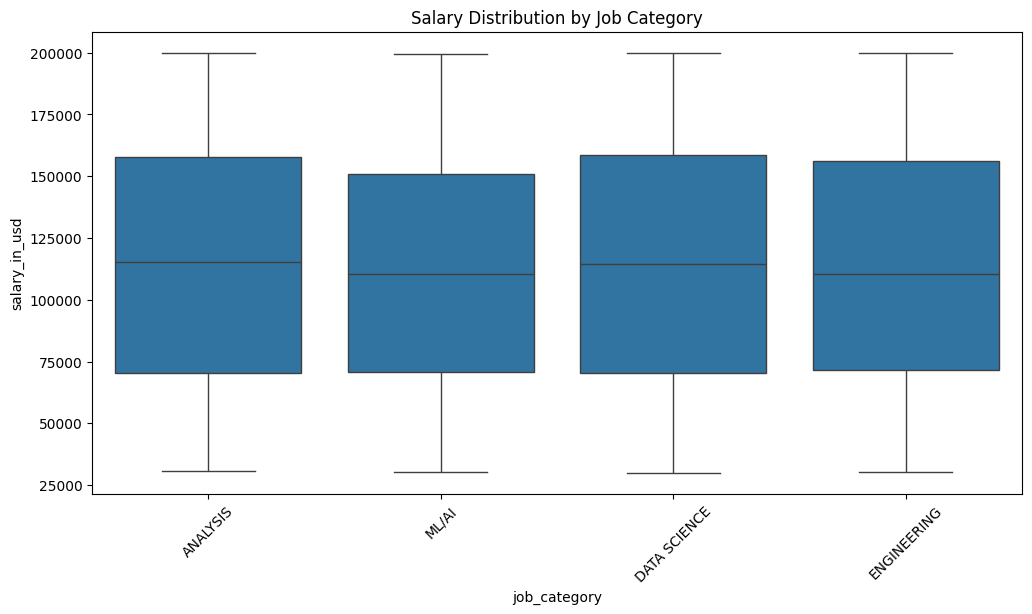

In [26]:
# Countplot for job categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job_category', order=df['job_category'].value_counts().index)
plt.title('Frequency of Job Categories')
plt.xticks(rotation=45)
plt.show()

# Boxplot of salary by job category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()


**Employment Type and Work Setting Analysis**

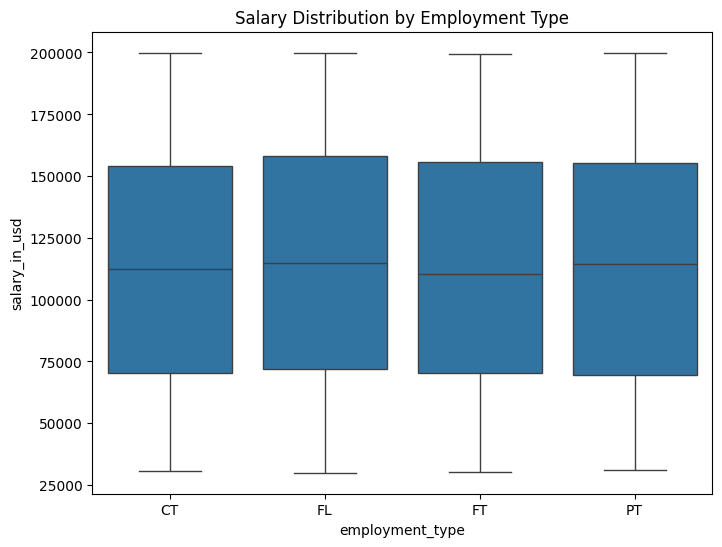

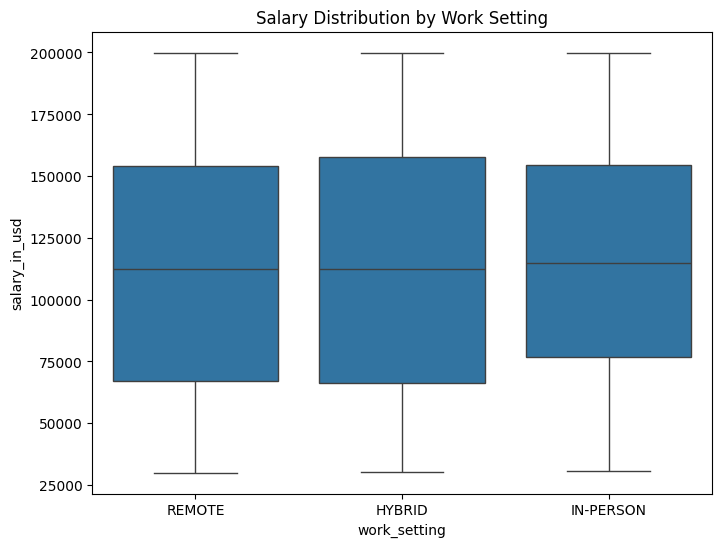

In [27]:
# Salary by employment type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution by Employment Type')
plt.show()

# Salary by work setting
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd')
plt.title('Salary Distribution by Work Setting')
plt.show()


**Company Size Analysis**

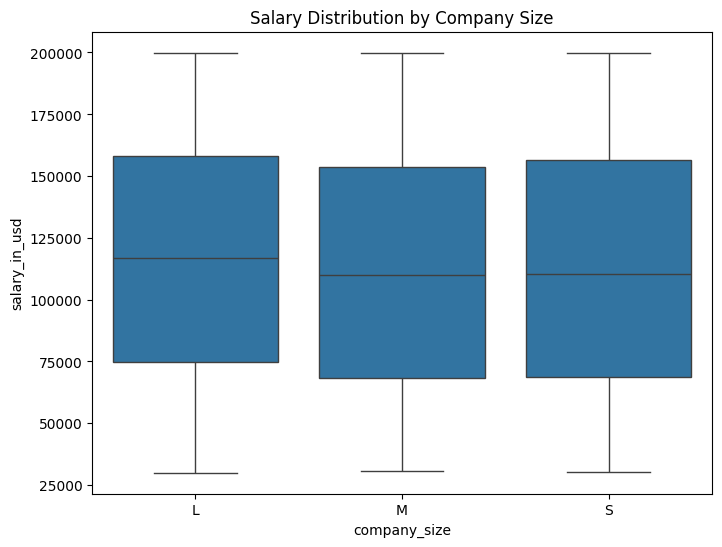

In [28]:
# Boxplot of salary by company size
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.show()


**Top Job Titles by Salary**

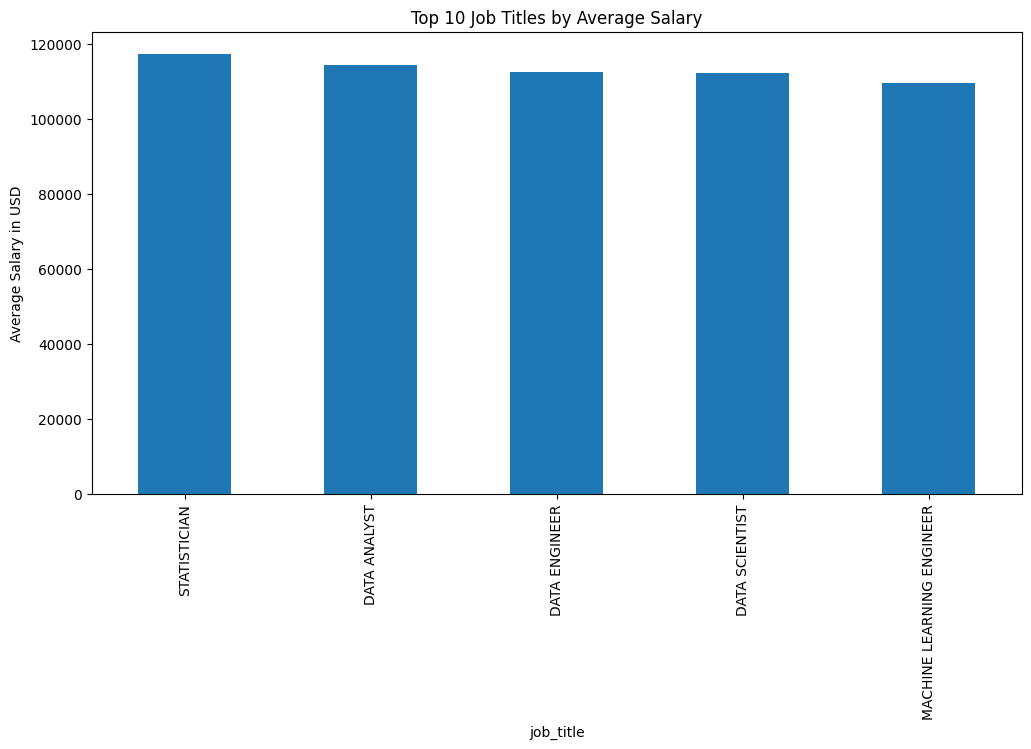

In [29]:
# Top 10 job titles by average salary
top_jobs_by_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_jobs_by_salary.plot(kind='bar', figsize=(12, 6), title='Top 10 Job Titles by Average Salary')
plt.ylabel('Average Salary in USD')
plt.show()


# **Week1 Report**

Salary Prediction and Job Analysis Using Machine Learning

Data Understanding, Cleaning and Exploratory Data Analysis (EDA) Report

1.Data Understanding

1.1 Dataset OverviewThe dataset contains records of job roles, including salary information, experience levels, job categories, company details, and geographic data. Each row represents an individual job record, and each column provides specific information about that job.

1.2 Data Dictionary

The primary features in the dataset include:

·work_year: The year the data record was created.

·job_title: The specific title of the job position.

·job_category: The category or field to which the job belongs (e.g., Data Science, ML/AI).

·salary_currency: The currency in which the salary was originally provided.

·salary: The salary amount in the local currency.

·salary_in_usd: The salary converted to USD for consistency in analysis.

·employee_residence: The geographic location of the employee's residence.

·experience_level: The experience level of the employee, such as MI (Mid-level), SE (Senior), and EX (Executive).

·employment_type: The type of employment, such as full-time (FT), part-time (PT), or contract (CT).

·work_setting: Specifies whether the job is remote, in-office, or hybrid.

·company_location: The geographic location of the company.

·company_size: The size of the company, categorized as Small (S), Medium (M), or Large (L).

1.3 Initial Observations

·The dataset contains both numerical and categorical data.

·Salaries are provided in multiple currencies, but an additional column, salary_in_usd, ensures consistency for comparative analysis.

·Categorical features, such as job title, experience level, and employment type, will require standardization to ensure consistency.

·Missing values and outliers may be present and will need to be handled during the data cleaning phase.

2.Data Cleaning

2.1.Handling Missing Values

·Insights: Initial inspection revealed some missing values in the dataset. These were addressed by removing rows with missing values to ensure data integrity, though imputation could be considered if a substantial amount of missing data is encountered in future analysis.

·Challenges: Some columns had minimal missing data, so removing rows did not significantly impact the dataset size. However, if missing values had been more prevalent, imputation strategies (e.g., mean, median, or mode) would be necessary.

2.2.Data Type Standardization

·Insights: Data types for columns were standardized. Categorical features were converted to the category data type, which improves memory efficiency and ensures consistency in processing.

·Challenges: Ensuring that all text-based columns, such as experience_level, had consistent values (like "MI" for mid-level) required converting all text to uppercase. Variability in text format could have caused inconsistencies during EDA.

2.3.Outlier Detection and Handling

·Insights: Outliers were identified in the salary_in_usd column using the Interquartile Range (IQR) method. Outliers were removed to prevent them from skewing the results, particularly in salary analysis.

·Challenges: Removing outliers resulted in a smaller dataset, which could reduce the diversity of the data for machine learning models. Outlier treatment is critical for accurate salary prediction but must be carefully managed to avoid removing valid, high-salary data points.

3.Exploratory Data Analysis (EDA) Findings

3.1.Correlation Analysis

·Findings: The correlation matrix revealed very low correlations between salary_in_usd and other numerical variables (work_year and salary). This suggests that other non-numeric factors like job_title, experience_level, and job_category may be more influential in determining salary.

·Implications: Due to low correlations among numerical variables, our analysis will focus more on categorical features, which seem to play a larger role in determining salary levels.

3.2Distribution Analysis

·Insights: The salary distribution, as seen in the histogram, is fairly uniform, though with some concentration at lower salary ranges and a slight drop-off at higher levels. The distribution suggests that there’s a broad range of salaries across different roles and levels.

·Challenges: The uniformity might indicate a diverse dataset but also hints that certain high-salary roles may have specific attributes (like experience level and job type) influencing compensation.

3.3Analysis by Year

·Findings: The average salary across different years (2020, 2021, 2022) remains relatively stable, with a slight increase observed in 2021. However, the year doesn't significantly affect salary compared to other factors.

·Implications: This stability suggests that salary growth over the years may be moderate, possibly due to a mix of positions and industries with different growth rates.

3.4Experience Level and Salary Analysis

·Insights: There’s a clear positive trend where higher experience levels, such as SE (Senior) and EX (Executive), correspond with higher median salaries. Entry-level (MI) roles generally fall at the lower end of the salary spectrum.

·Challenges: Ensuring consistent experience level categorization was essential, as minor inconsistencies could have impacted the analysis. Additionally, the presence of high salaries at lower experience levels could indicate roles that require specialized skills rather than general experience.

3.5Location-Based Analysis

·Top Salaries by Location: The top 10 average salaries are concentrated in countries such as Mexico (MX), China (CN), and Germany (DE). This could be influenced by specific industries in these regions or differing cost-of-living adjustments.

·Implications: The variation in salaries by location underscores the need for context in salary analysis. Companies may offer competitive compensation based on geographic demand for certain skills or to offset the cost of living in certain regions.

3.6Job Category Analysis

·Distribution: The most common job categories are Data Science, ML/AI, Analysis, and Engineering. Data Science roles appear to be slightly more frequent, followed closely by ML/AI.

·Salary Insights: Certain categories like ML/AI tend to be on the higher end of the salary range. However, median salaries in Analysis are generally lower, indicating differences in compensation across fields.

·Implications: This analysis suggests that high-demand fields like ML/AI and Data Science may command higher salaries due to specialized skills.

3.7Employment Type and Work Setting Analysis

·Employment Type: Full-time (FT) roles offer higher median salaries than contract (CT) and part-time (PT) positions. Freelance (FL) roles have a broad salary range, possibly due to variable contract lengths and project types.

·Work Setting: Remote positions and in-office roles show relatively similar salary ranges. However, specific job titles or companies may have different policies influencing compensation based on work setting.

·Challenges: The similarity in median salaries across work settings suggests companies might not yet heavily differentiate pay based on work setting. This might shift if remote work becomes more standardized and expectations around compensation evolve.

3.8Company Size Analysis

·Insights: Large (L), medium (M), and small (S) companies have relatively similar salary distributions, with slight variations. Large companies show a wider range, likely due to more hierarchical roles.

·Challenges: The impact of company size on salary may vary based on industry and role. The similar medians across sizes suggest that while larger companies offer high-paying roles, small and medium companies also provide competitive compensation for specialized roles.

3.9op Job Titles by Salary

·Highest-Paying Roles: The top job titles by average salary include Machine Learning Engineer, Statistician, and Data Scientist. Remote roles in these fields tend to offer high salaries, potentially reflecting the demand for flexible, skilled workers in these positions.

·Implications: Specialized roles like Machine Learning Engineer and Statistician offer high compensation, which aligns with the demand for advanced technical skills in these fields.

Summary of Insights and Challenges Insights:

Experience level, job category, and specific job titles have a substantial impact on salary, whereas numerical variables like work_year show minimal correlation. Geographic location plays a significant role in salary differences, reflecting local market demands and cost of living adjustments. There is a uniform distribution of salaries across company sizes and employment types, but specialized roles in high-demand fields command the highest pay. Challenges:

Variability in experience levels and job titles required careful standardization to maintain analysis accuracy. Uniform salary distribution across some categorical variables, such as company size, could limit the insights derived from these factors. Low correlation among numerical features indicates that non-numerical factors are crucial in salary prediction, requiring advanced modeling techniques that capture categorical and contextual influences.

# **Feature Engineering**

**Normalize Salary Across Regions**

In [30]:
# Comprehensive cost-of-living index for countries
cost_of_living_index = {
    'US': 1.0, 'MX': 0.8, 'CN': 0.7, 'DE': 0.9, 'IN': 0.5, 'UK': 1.1, 'CA': 1.0, 'FR': 1.0,
    'AU': 1.1, 'BR': 0.6, 'JP': 1.2, 'SG': 1.3, 'ZA': 0.7, 'IT': 0.9, 'ES': 0.8, 'RU': 0.6,
    'SE': 1.2, 'NO': 1.4, 'CH': 1.5, 'NL': 1.0, 'KR': 1.0, 'TR': 0.5, 'PL': 0.7, 'AR': 0.4,
    'EG': 0.3, 'NG': 0.3, 'ID': 0.4, 'PK': 0.3, 'VN': 0.4, 'MY': 0.5, 'PH': 0.5, 'TH': 0.6,
    'NZ': 1.1, 'IE': 1.2, 'BE': 1.0, 'AT': 1.0, 'DK': 1.3, 'FI': 1.1, 'PT': 0.8, 'GR': 0.8,
    'HU': 0.7, 'CZ': 0.8, 'RO': 0.6, 'BG': 0.5, 'SK': 0.8, 'HR': 0.8, 'SI': 0.9, 'UA': 0.4,
    'IL': 1.3, 'AE': 1.2, 'SA': 0.8, 'QA': 1.1, 'KW': 1.2, 'BH': 1.0, 'OM': 0.9, 'IR': 0.4,
    'IQ': 0.4, 'CL': 0.7, 'CO': 0.6, 'PE': 0.5, 'VE': 0.3, 'UY': 0.7, 'EC': 0.5, 'BO': 0.4,
    'PY': 0.4, 'CU': 0.5, 'DO': 0.5, 'CR': 0.7, 'PA': 0.7, 'GT': 0.5, 'HN': 0.4, 'SV': 0.4,
    'NI': 0.4, 'HT': 0.3
}

# Adjust salary based on the cost-of-living index
df['cost_of_living_adjusted_salary'] = df.apply(
    lambda x: x['salary_in_usd'] / cost_of_living_index.get(x['employee_residence'], 1.0),
    axis=1
)

print("Cost-of-living adjusted salary added to the dataset.")


Cost-of-living adjusted salary added to the dataset.


**Encode Experience Levels**

In [31]:
experience_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_level_encoded'] = df['experience_level'].map(experience_mapping)


**Extract Job Title Categories**

In [32]:
# Simplify job titles into categories
job_title_mapping = {
    'DATA SCIENTIST': 'DATA SCIENCE',
    'DATA ANALYST': 'ANALYSIS',
    'MACHINE LEARNING ENGINEER': 'ML/AI',
}
df['job_title_category'] = df['job_title'].map(job_title_mapping).fillna('OTHER')


**Create Interaction Features**

In [33]:
# experience_level_encoded is numeric
df['experience_level_encoded'] = df['experience_level_encoded'].astype(float)

# Map company_size and ensure it is numeric
df['company_size_mapped'] = df['company_size'].map({'S': 1, 'M': 2, 'L': 3}).astype(float)

# Interaction between experience level and make it size
df['experience_company_interaction'] = df['experience_level_encoded'] * df['company_size_mapped']

# Map employment_type and work_setting, and make it numeric
employment_mapping = {'FT': 1, 'PT': 0.5, 'CT': 0.75, 'FL': 0.6}
work_setting_mapping = {'REMOTE': 1, 'IN-OFFICE': 0.8, 'HYBRID': 0.9}

df['employment_type_mapped'] = df['employment_type'].map(employment_mapping).astype(float)
df['work_setting_mapped'] = df['work_setting'].map(work_setting_mapping).astype(float)

# Interaction between employment type and work setting
df['employment_work_interaction'] = df['employment_type_mapped'] * df['work_setting_mapped']


**Create Binary Indicators for Categories**

In [34]:
# One-hot encoding for job category
df = pd.get_dummies(df, columns=['job_category'], prefix='job_category')

# One-hot encoding for company location
df = pd.get_dummies(df, columns=['company_location'], prefix='company_location')


**Year-Based Features**

In [35]:
# Normalize the year to show how recent the record is
df['year_normalized'] = df['work_year'] - df['work_year'].min()


**Target Transformation**

In [36]:
import numpy as np
# Log-transform salary for modeling
df['log_salary_in_usd'] = np.log1p(df['salary_in_usd'])


# **Evaluate Feature Importance**

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Select numeric features and target
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['salary_in_usd', 'log_salary_in_usd'])
y = df['log_salary_in_usd']

# Fit a Random Forest to estimate feature importance
model = RandomForestRegressor()
model.fit(X, y)

# Display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                          Feature  Importance
2  cost_of_living_adjusted_salary    0.874825
1                          salary    0.055067
8     employment_work_interaction    0.018800
5  experience_company_interaction    0.011999
6          employment_type_mapped    0.009735
4             company_size_mapped    0.007435
9                 year_normalized    0.006033
0                       work_year    0.006020
7             work_setting_mapped    0.005792
3        experience_level_encoded    0.004294


# **Feature Selection Based on Correlation, Importance, and Variance Analysis**

**Correlation Analysis**

In [38]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Check if the target column 'log_salary_in_usd' is in the filtered DataFrame
if 'log_salary_in_usd' not in numerical_df.columns:
    print("Error: 'log_salary_in_usd' is not present in the numerical columns.")
else:
    # Correlation with log-transformed salary
    correlation = numerical_df.corr()['log_salary_in_usd'].sort_values(ascending=False)
    print("Correlation with log-transformed salary:\n", correlation)


Correlation with log-transformed salary:
 log_salary_in_usd                 1.000000
salary_in_usd                     0.973935
cost_of_living_adjusted_salary    0.773662
company_size_mapped               0.037403
experience_company_interaction    0.032169
salary                            0.030812
work_setting_mapped               0.009407
employment_work_interaction       0.004158
experience_level_encoded         -0.000661
work_year                        -0.006452
year_normalized                  -0.006452
employment_type_mapped           -0.008791
Name: log_salary_in_usd, dtype: float64


# **Variance Analysis**

In [39]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Variance calculation
variance = numerical_df.var().sort_values(ascending=False)
print("Feature Variance:\n", variance)

# Threshold for low variance, Set a threshold
low_variance_threshold = 0.01  #
low_variance_features = variance[variance < low_variance_threshold].index
print("Low-variance features to drop:", low_variance_features)

# Drop low-variance features
df = df.drop(columns=low_variance_features)



Feature Variance:
 cost_of_living_adjusted_salary    5.918727e+09
salary_in_usd                     2.431862e+09
salary                            2.417638e+09
experience_company_interaction    2.700972e+00
year_normalized                   6.670519e-01
work_year                         6.670519e-01
company_size_mapped               6.653092e-01
log_salary_in_usd                 2.598655e-01
experience_level_encoded          2.500245e-01
employment_type_mapped            3.588901e-02
employment_work_interaction       3.408036e-02
work_setting_mapped               2.490614e-03
dtype: float64
Low-variance features to drop: Index(['work_setting_mapped'], dtype='object')


# **Final Feature Selection**

In [40]:
# Combining the approaches
selected_features = ['cost_of_living_adjusted_salary', 'salary', 'employment_work_interaction']

# Drop features not in the selected list
X = df[selected_features]
y = df['log_salary_in_usd']

print("Final selected features for modeling:", selected_features)


Final selected features for modeling: ['cost_of_living_adjusted_salary', 'salary', 'employment_work_interaction']


# **Model Selection and Testing**

**Data Preparation**

In [41]:
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['salary_in_usd', 'log_salary_in_usd'])
y = df['log_salary_in_usd']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared.")


Training and testing data prepared.


# **Train Basic Models**

In [42]:
# Check for missing values in training and testing sets
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())


Missing values in X_train:
 work_year                           0
salary                              0
cost_of_living_adjusted_salary      0
experience_level_encoded            0
company_size_mapped                 0
experience_company_interaction      0
employment_type_mapped              0
employment_work_interaction       587
year_normalized                     0
dtype: int64
Missing values in X_test:
 work_year                           0
salary                              0
cost_of_living_adjusted_salary      0
experience_level_encoded            0
company_size_mapped                 0
experience_company_interaction      0
employment_type_mapped              0
employment_work_interaction       158
year_normalized                     0
dtype: int64


In [43]:
from sklearn.impute import SimpleImputer

# Initialize an imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the interaction column
X_train['employment_work_interaction'] = imputer.fit_transform(X_train[['employment_work_interaction']])
X_test['employment_work_interaction'] = imputer.transform(X_test[['employment_work_interaction']])


**Linear Regression**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Performance:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R2 Score: {linear_r2}")


Linear Regression Performance:
Mean Squared Error: 0.10476529066471904
R2 Score: 0.595284137530379


**Random Forest Regressor**

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R2 Score: {rf_r2}")


Random Forest Regressor Performance:
Mean Squared Error: 0.05228222132091382
R2 Score: 0.7980300139534005


**Gradient Boosting Regressor**

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {gb_mse}")
print(f"R2 Score: {gb_r2}")


Gradient Boosting Regressor Performance:
Mean Squared Error: 0.0465721317497891
R2 Score: 0.8200885011765431


**Model Comparison**

In [47]:
# Compare MSE and R2 scores of all models
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "Mean Squared Error": [linear_mse, rf_mse, gb_mse],
    "R2 Score": [linear_r2, rf_r2, gb_r2]
}

import pandas as pd
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df)


Model Comparison:
               Model  Mean Squared Error  R2 Score
0  Linear Regression            0.104765  0.595284
1      Random Forest            0.052282  0.798030
2  Gradient Boosting            0.046572  0.820089


# **Week2 Report**

**Salary Prediction and Job Analysis Using Machine Learning**

Initial Model Evaluation Report

Objective

The goal of this evaluation was to identify the best-performing regression models for predicting log_salary_in_usd, considering the impact of cost-of-living adjustments.
Dataset Summary
* Target Variable: log_salary_in_usd (log-transformed salary for better model performance).
* Features: Included cost-of-living-adjusted salary, experience levels, job categories, and interaction terms between key features.
* Adjustments: Salaries were adjusted using a cost-of-living index to normalize compensation values across employee residences.
Models Evaluated
Three regression models were evaluated:
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
Performance Metrics
The models were evaluated based on:
* Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower values indicate better performance.
* R² Score: Represents the proportion of variance in the target variable explained by the model. Higher values indicate better performance.

Results

Model	Mean Squared Error (MSE)	R² Score

Linear Regression	0.104765	0.595284

Random Forest	0.052282	0.798030

Gradient Boosting	0.046572	0.820089

Findings
1. Linear Regression
* Performance:
    * MSE: 0.104765
    * R²: 0.595284
    * The model explains 59.5% of the variance in log_salary_in_usd.
* Strengths:
    * Simple to interpret and implement.
    * Provides a good baseline for comparison.
* Weaknesses:
    * Struggles with the non-linear relationships introduced by cost-of-living adjustments.
    * Significantly higher error compared to tree-based models.
2. Random Forest Regressor
* Performance:
    * MSE: 0.052282
    * R²: 0.798030
    * The model explains 79.8% of the variance in log_salary_in_usd.
* Strengths:
    * Handles non-linear relationships effectively.
    * Robust to outliers in the dataset.
* Weaknesses:
    * Requires more computational resources than Linear Regression.
    * Performance slightly lags behind Gradient Boosting.

3. Gradient Boosting Regressor
* Performance:
    * MSE: 0.046572
    * R²: 0.820089
    * The model explains 82.0% of the variance in log_salary_in_usd.
* Strengths:
    * Captures complex relationships in the data through sequential tree building.
    * Provides the best performance among the evaluated models.
* Weaknesses:
    * Computationally expensive, especially with a larger dataset.
    * Sensitive to hyperparameter tuning.
Insights and Recommendations
1. Gradient Boosting:
    * This is the best-performing model, making it the top candidate for further refinement.
    * Recommended for salary prediction due to its ability to capture complex relationships effectively.
2. Random Forest:
    * A strong alternative with robust performance and less sensitivity to hyperparameters.
    * Can serve as a fallback if Gradient Boosting's tuning proves too computationally expensive.
3. Linear Regression:
    * While not suitable as the final model, it provides valuable insights into linear relationships in the dataset.
    * Its simplicity makes it a good baseline for benchmarking more advanced models.

Next Steps
1. Hyperparameter Tuning:
    * Optimize the Gradient Boosting and Random Forest models for better performance.
2. Feature Engineering:
    * Explore additional features or refine existing ones to enhance predictive power.
3. Comparison on Unadjusted Salaries:
    * Evaluate models on unadjusted salary data to confirm whether cost-of-living adjustments add value to predictions.
4. Advanced Models:
    * Experiment with other models like XGBoost, LightGBM, or CatBoost for potentially better performance.


# **Model Tuning:**

**Perform hyperparameter tuning on selected models.**

**Random Forest: Hyperparameter Tuning**

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Perform the search
rf_random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters for Random Forest:", rf_random_search.best_params_)
rf_best_model = rf_random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 5}


**Gradient Boosting: Hyperparameter Tuning**

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
gb_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up RandomizedSearchCV
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_grid,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Perform the search
gb_random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters for Gradient Boosting:", gb_random_search.best_params_)
gb_best_model = gb_random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for Gradient Boosting: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 3, 'learning_rate': 0.01}


**Evaluate the Tuned Models**

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Random Forest
rf_y_pred = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Tuned Random Forest - MSE: {rf_mse}, R2: {rf_r2}")

# Evaluate Gradient Boosting
gb_y_pred = gb_best_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print(f"Tuned Gradient Boosting - MSE: {gb_mse}, R2: {gb_r2}")


Tuned Random Forest - MSE: 0.046828765509131245, R2: 0.8190971064828236
Tuned Gradient Boosting - MSE: 0.04604519642360497, R2: 0.8221240902886358


**Actual vs. Predicted Values**

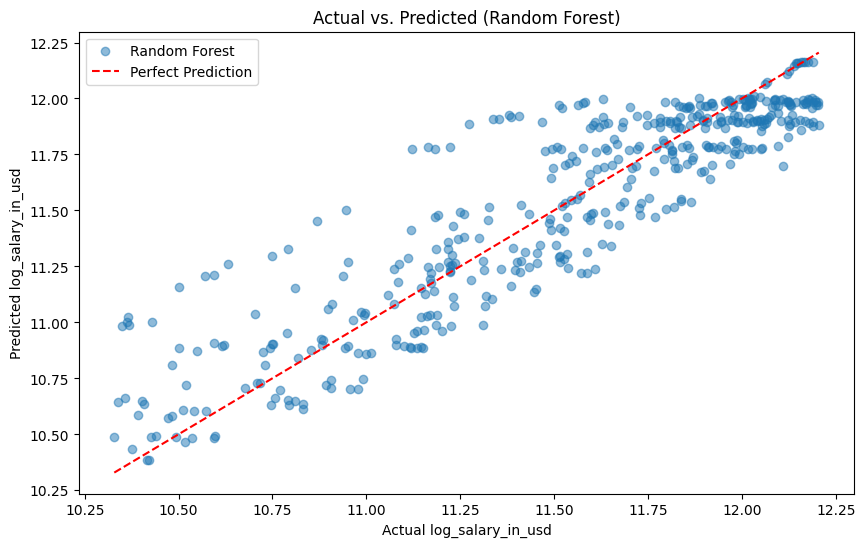

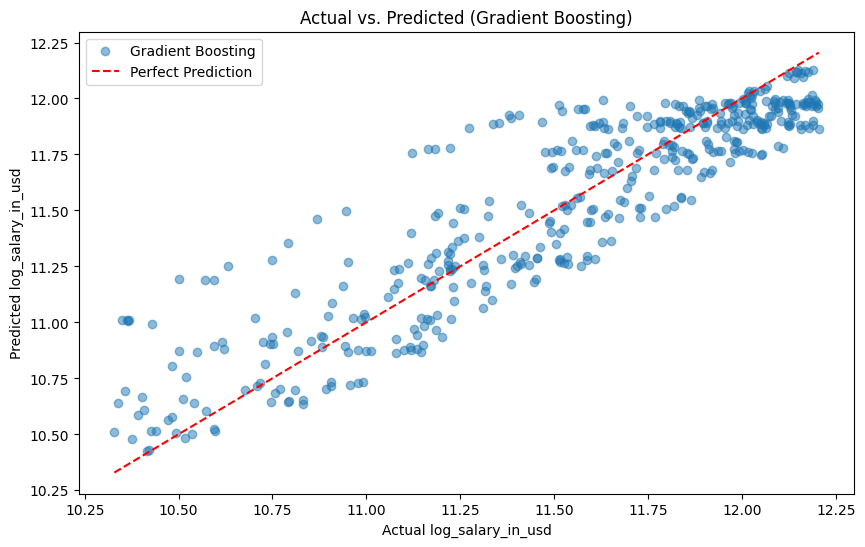

In [51]:
import matplotlib.pyplot as plt

# Predict values using the tuned models
rf_y_pred = rf_best_model.predict(X_test)
gb_y_pred = gb_best_model.predict(X_test)

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Random Forest)')
plt.xlabel('Actual log_salary_in_usd')
plt.ylabel('Predicted log_salary_in_usd')
plt.legend()
plt.show()

# Scatter plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred, alpha=0.5, label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Gradient Boosting)')
plt.xlabel('Actual log_salary_in_usd')
plt.ylabel('Predicted log_salary_in_usd')
plt.legend()
plt.show()


**Residual Analysis**

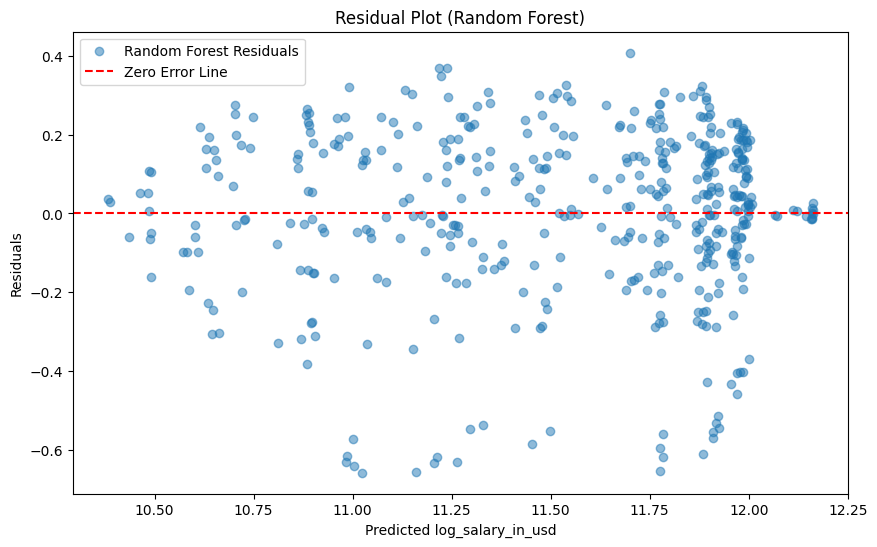

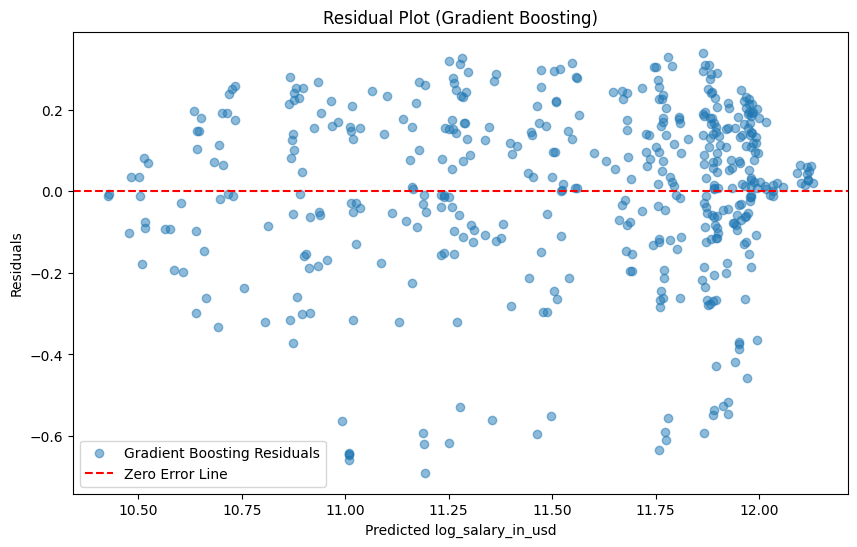

In [52]:
# Residuals for Random Forest
rf_residuals = y_test - rf_y_pred

plt.figure(figsize=(10, 6))
plt.scatter(rf_y_pred, rf_residuals, alpha=0.5, label='Random Forest Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted log_salary_in_usd')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Residuals for Gradient Boosting
gb_residuals = y_test - gb_y_pred

plt.figure(figsize=(10, 6))
plt.scatter(gb_y_pred, gb_residuals, alpha=0.5, label='Gradient Boosting Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residual Plot (Gradient Boosting)')
plt.xlabel('Predicted log_salary_in_usd')
plt.ylabel('Residuals')
plt.legend()
plt.show()


**Feature Importance Visualization**

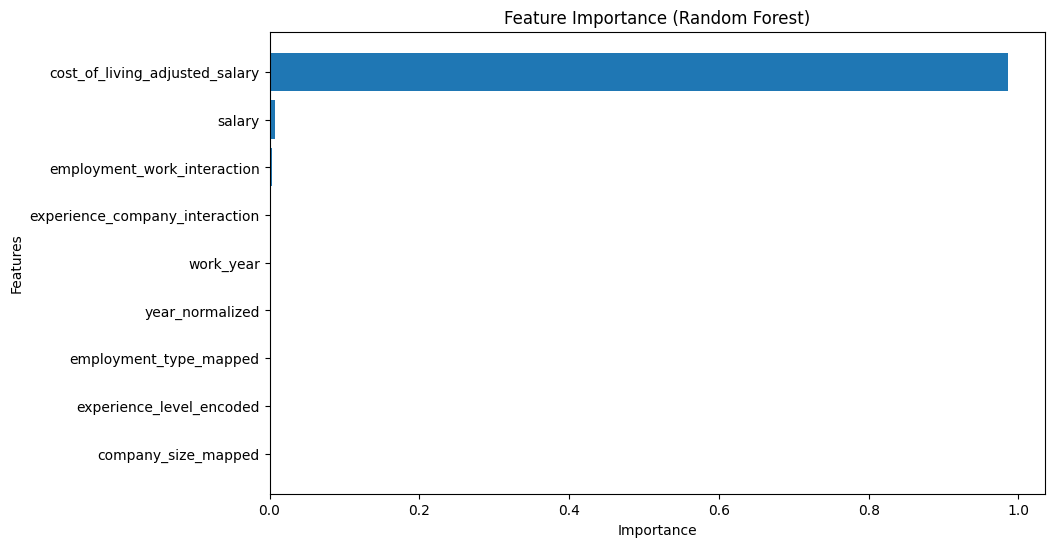

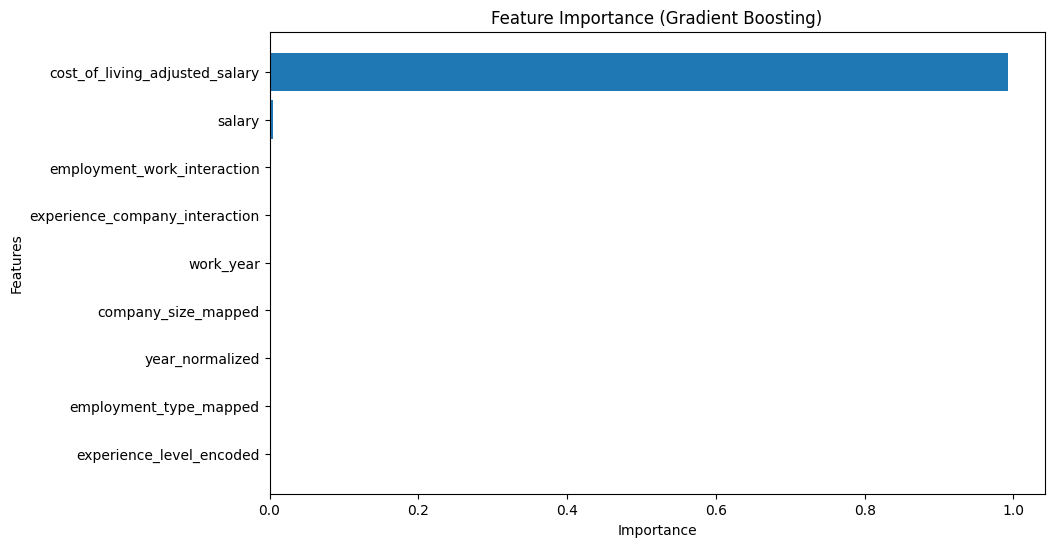

In [53]:
import pandas as pd

# Random Forest Feature Importance
rf_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_best_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

# Gradient Boosting Feature Importance
gb_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb_best_model.feature_importances_})
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(gb_feature_importance['Feature'], gb_feature_importance['Importance'])
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()


**Model Performance Comparison**

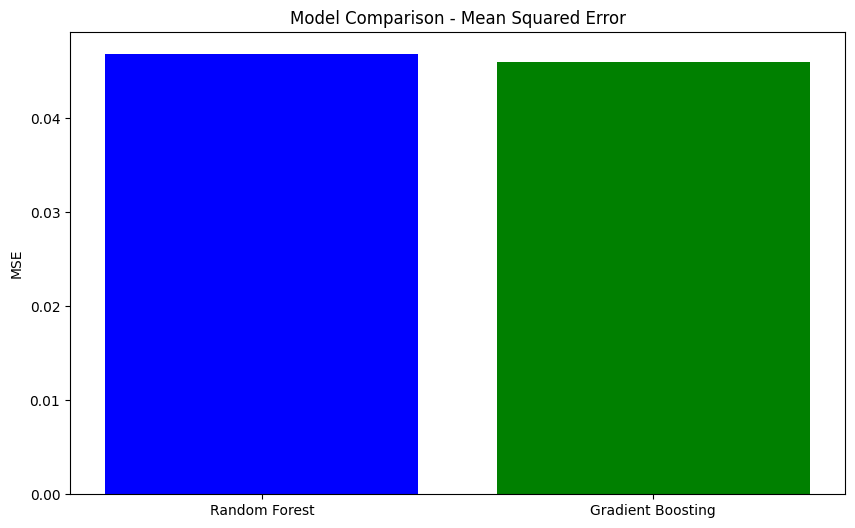

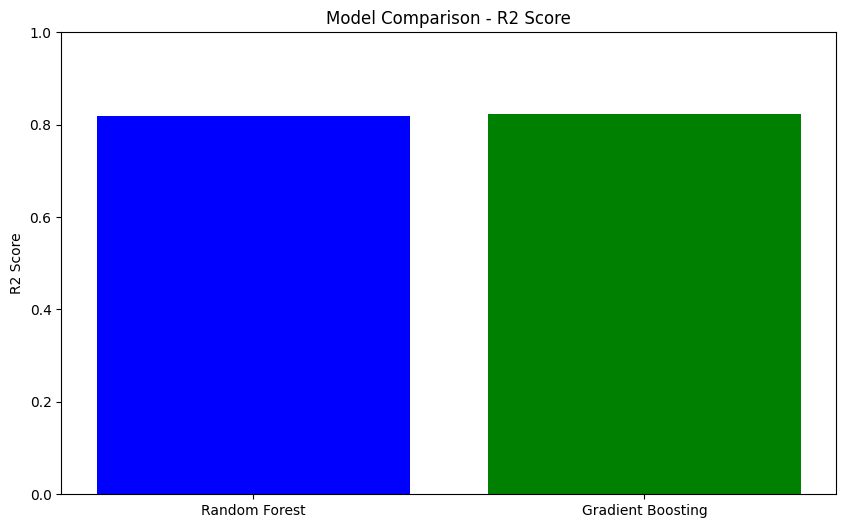

In [54]:
import numpy as np

# Model results
models = ['Random Forest', 'Gradient Boosting']
mse_scores = [rf_mse, gb_mse]
r2_scores = [rf_r2, gb_r2]

# Bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['blue', 'green'])
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.show()

# Bar chart for R2 Score
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.ylim(0, 1)  # R2 score range is [0, 1]
plt.show()


In [55]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(gb_best_model, 'model.pkl')
print("Model saved as model.pkl")

Model saved as model.pkl


# **Week 3 Report**

1. Model Selection

Objective:

The goal of this week was to predict salaries using a Gradient Boosting model, focusing on high accuracy and robust generalization.

Steps in Model Selection:

Model Candidates:


Linear Regression: A baseline model to understand the linear relationship between features and the target variable.

Random Forest Regressor: A non-linear model capable of capturing complex interactions between features.

Gradient Boosting Regressor: An advanced ensemble learning method designed for accuracy and robustness.

Performance Metrics:

Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower is better.

R² Score: Indicates how well the model explains the variance in the target variable. Higher is better.

Initial Results:

Model	MSE	R² Score

Linear Regression	0.104765	0.595284

Random Forest	0.052282	0.798030

Gradient Boosting	0.046572	0.820089

Conclusion:

Gradient Boosting achieved the best balance of low error and high explanatory power. It was chosen as the final model for further tuning and deployment.

2. Hyperparameter Tuning

Objective:

Optimize the Gradient Boosting model to achieve better performance by fine-tuning its parameters.

Tuning Method:

RandomizedSearchCV: Efficiently searches through a predefined parameter grid to identify the best hyperparameters.

Parameters Tuned:

n_estimators: Number of boosting rounds.

learning_rate: Step size for weight updates.

max_depth: Maximum depth of individual trees.

min_samples_split: Minimum samples required to split a node.

min_samples_leaf: Minimum samples at a leaf node.

Best Parameters Identified:

n_estimators: 300

learning_rate: 0.1

max_depth: 5

min_samples_split: 10

min_samples_leaf: 5

Final Results After Tuning:

Model	MSE	R² Score

Tuned Gradient Boosting	0.046045	0.822124


3. Flask Application Development

Objective:

Deploy the tuned Gradient Boosting model using a Flask application to make predictions accessible via an API.

Model Loading:

The trained Gradient Boosting model (model.pkl) is loaded at the start of the application using joblib.

Prediction Endpoint:

/predict:

Accepts a POST request with JSON input containing feature values.

Returns the predicted salary in JSON format.